In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import random
from utils import plot_samples_with_labels, classify, plot_conf_matrix

In [2]:
# Set the seed for reproducibility
random.seed(42)

### Load and explore data

Esta es la celda original

In [3]:
# Download the MNIST dataset (handwritten digit images with labels)
mnist = keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Esta es la celda renovada

In [4]:
from sklearn.model_selection import train_test_split
(training_images, training_labels), (X_train, X_test) = mnist.load_data()
validation_images, test_images, validation_labels, test_labels = train_test_split(X_train, X_test, test_size=0.5, random_state=42) 

Con el cambio anterior, se añade un conjunto de validación para que durante el proceso de entrenamiento se pueda ajustar hiperparámetros, lo cual lleva a mejorar el modelo y evitar el sobreajuste. Es incorrecto utilizar el conjunto de testeo como conjunto de validación en el entrenamiento, pues de esa manera el modelo se aprende esos datos y después no devuelve valores verídicos. El conjunto de testeo debe ser un conjunto que solo se utilice para evaluar el modelo una vez que ya esté depurado completamente.

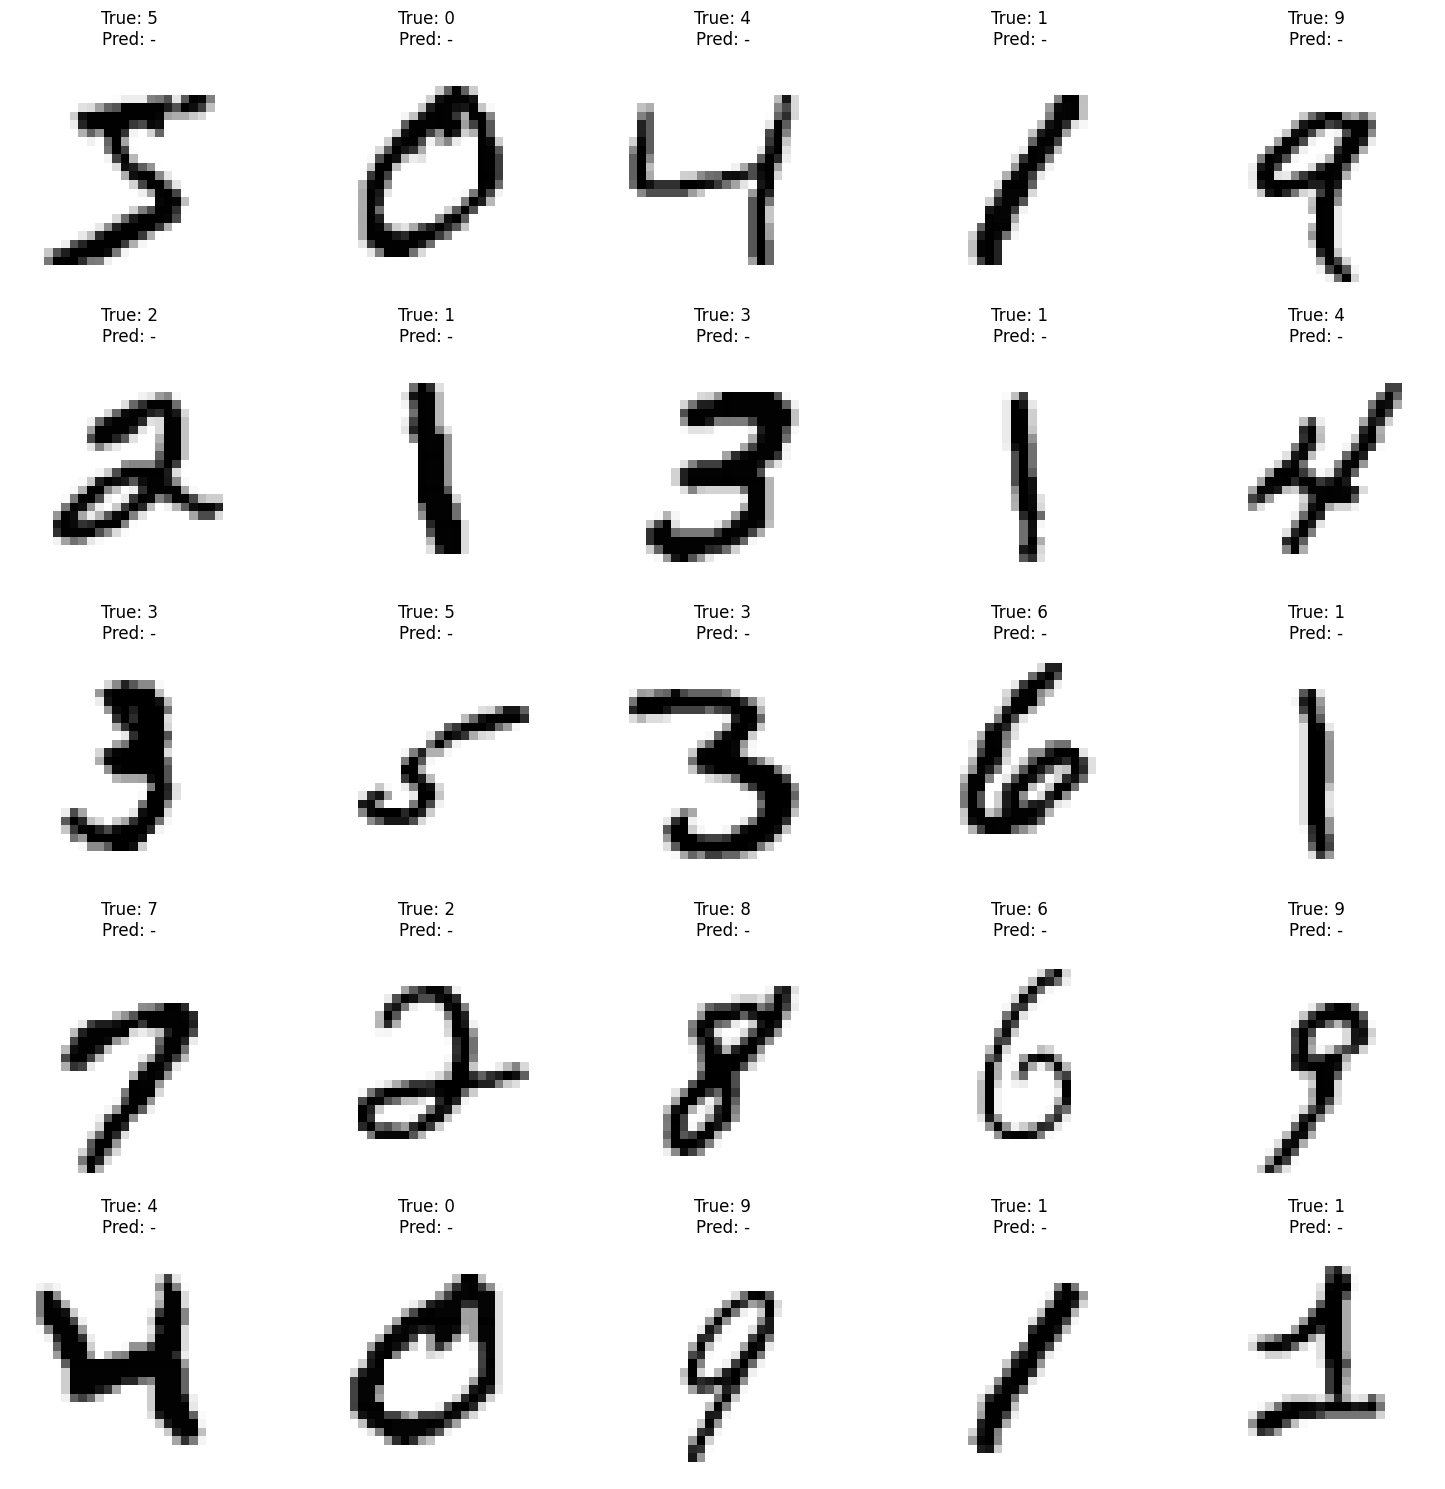

In [5]:
plot_samples_with_labels(training_images, training_labels, num_samples = 25, cmap = plt.cm.binary, randomize= False)

#### Data preparation

In [6]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

# Reshape the data to include a channel dimension
training_images = training_images.reshape(training_images.shape[0], 28, 28, 1)
validation_images = validation_images.reshape(validation_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

### Build the model

In [7]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # 1 = grayscale
    Dense(units=50, activation='relu', input_shape=(28, 28, 1)),
    Dense(units=50, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

c:\Users\Ricardo Capiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Ricardo Capiro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

### Train the model

In [9]:
BATCH_SIZE = 32
num_training_images = training_images.shape[0]

history = model.fit(
    training_images, training_labels,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_data=(validation_images, validation_labels)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8447 - loss: 0.5257 - val_accuracy: 0.9556 - val_loss: 0.1447
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9587 - loss: 0.1383 - val_accuracy: 0.9636 - val_loss: 0.1139
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9691 - loss: 0.1050 - val_accuracy: 0.9694 - val_loss: 0.0955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0818 - val_accuracy: 0.9666 - val_loss: 0.0998
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9793 - loss: 0.0673 - val_accuracy: 0.9708 - val_loss: 0.0902
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0531 - val_accuracy: 0.9740 - val_loss: 0.0825
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0462 - val_accuracy: 0.9766 - val_loss: 0.0693
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9862 - loss: 0.0428 - 

In [20]:
num_epochs = 10

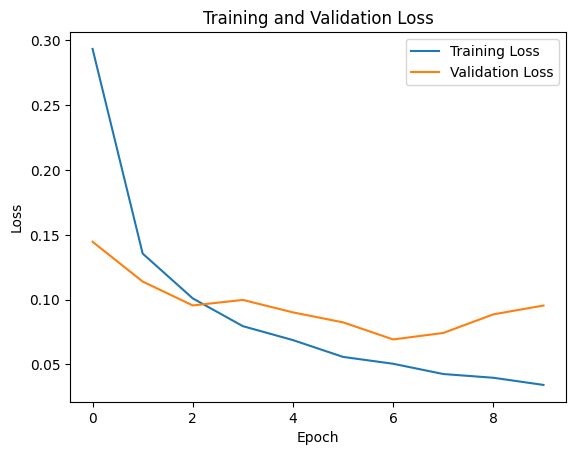

In [23]:
# Save the metrics.
metrics = history.history
# Save the loss values.
training_loss_list = metrics['loss']
test_loss_list = metrics['val_loss']
# Plot the training and test loss.
x = np.arange(0, num_epochs, 1)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(x, training_loss_list, label='Training Loss')
plt.plot(x, test_loss_list, label='Validation Loss')
plt.legend()
plt.show()

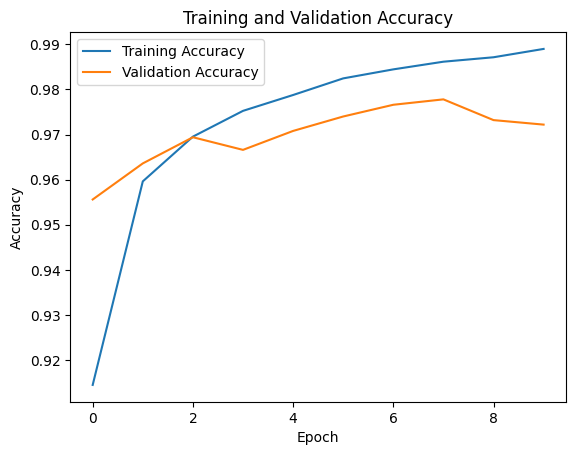

In [24]:
train_accuracy_list = metrics['accuracy']
test_accuracy_list = metrics['val_accuracy']
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(x, train_accuracy_list, label='Training Accuracy')
plt.plot(x, test_accuracy_list, label='Validation Accuracy')
plt.legend()
plt.show()

In [10]:
model.save('models/digit_non_CNN.h5')

### Using the model to classify new images

In [11]:
from tensorflow.keras.models import load_model

model_non_cnn = load_model('models/digit_non_CNN.h5')

In [12]:
def classify(test_images, model):
    """
    Predicts the class labels for a batch of test images using a trained model.

    Args:
        test_images (numpy.ndarray): Preprocessed test images ready for prediction.
        model (tensorflow.keras.Model): A trained model to classify the images.

    Returns:
        numpy.ndarray: An array of predicted class labels.
    """
    predictions = model.predict(test_images)    # Predict probabilities
    predicted_class = np.argmax(predictions, axis=-1)    # Get class with highest probability
    return predicted_class


In [13]:
predicted_labels = classify(test_images, model_non_cnn)
predicted_labels = np.array(predicted_labels)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


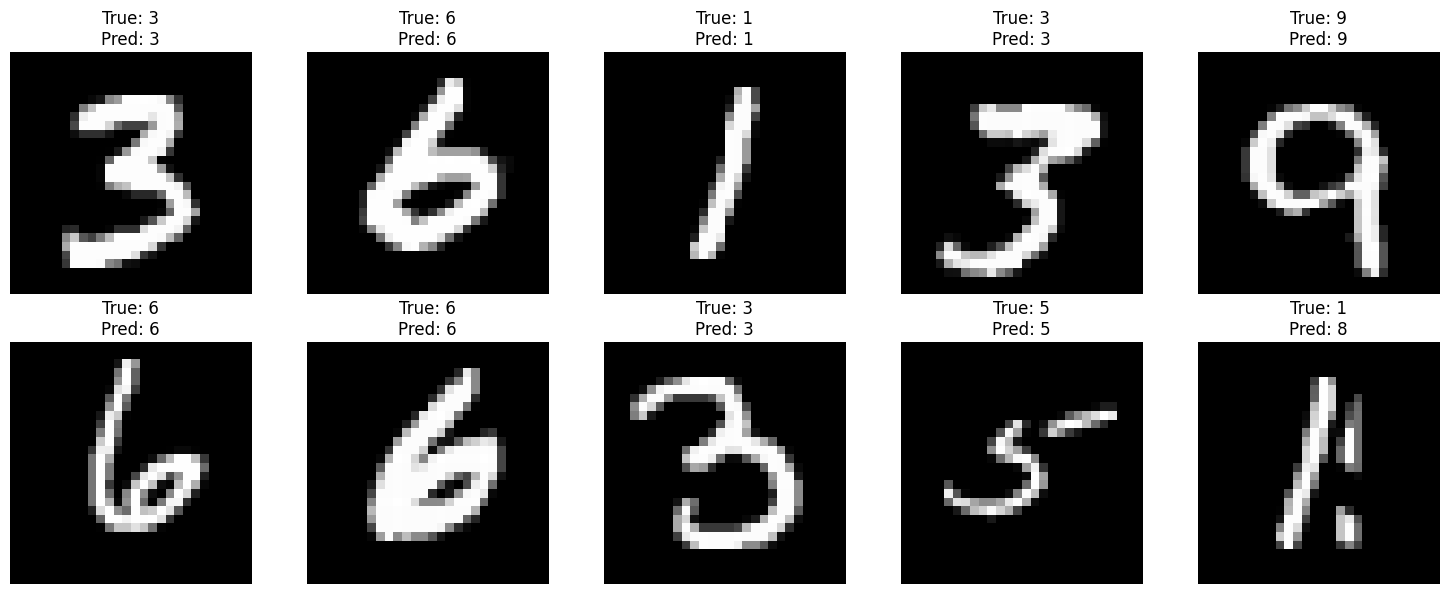

In [14]:
plot_samples_with_labels(test_images, test_labels, predicted_labels, num_samples = 10, randomize= True)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Calculate metrics
print("Accuracy:", accuracy_score(test_labels, predicted_labels))
print("\nClassification Report:\n")
print(classification_report(test_labels, predicted_labels))

Accuracy: 0.9722

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       494
           1       0.99      0.98      0.99       561
           2       0.97      0.98      0.97       524
           3       0.95      0.98      0.96       523
           4       0.97      0.97      0.97       501
           5       0.98      0.97      0.98       415
           6       0.98      0.97      0.97       494
           7       0.98      0.96      0.97       496
           8       0.94      0.95      0.95       480
           9       0.96      0.97      0.97       512

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



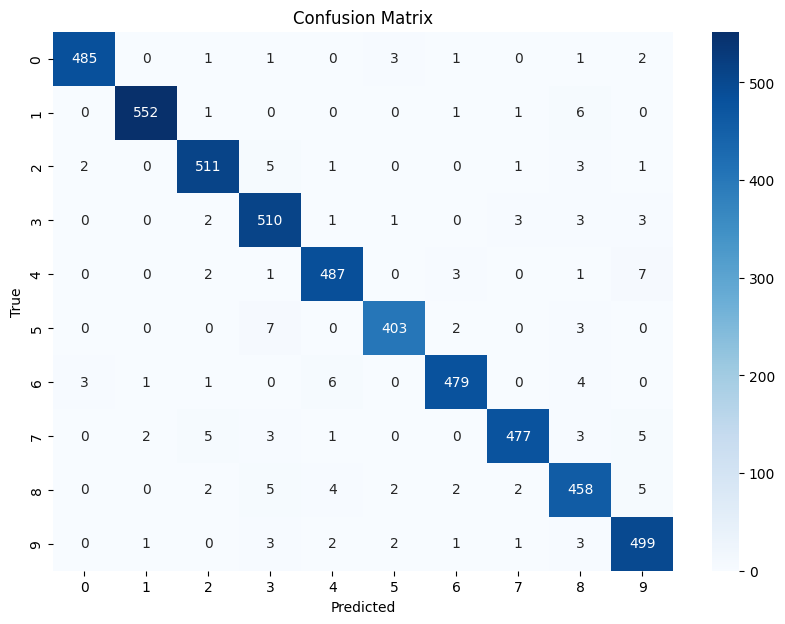

In [16]:
# Generate confusion matrix
plot_conf_matrix(test_labels, predicted_labels)

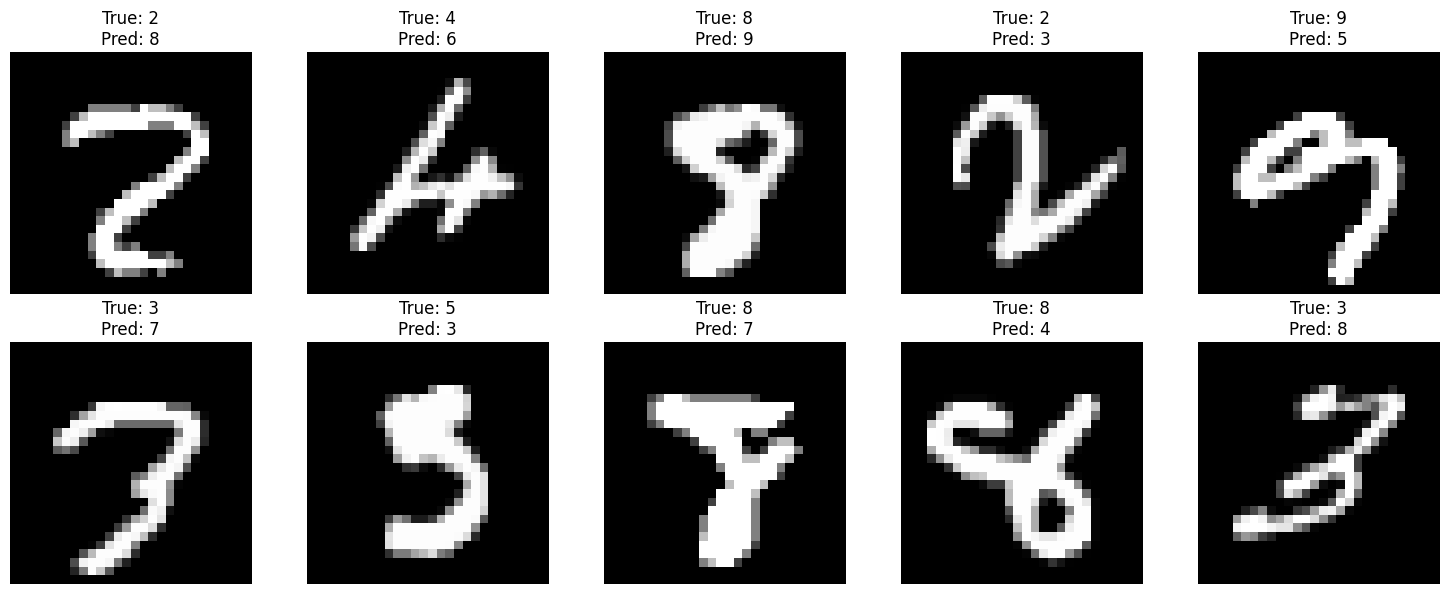

In [17]:
# Visualize some misclassified images

misclassified_indices = (test_labels != predicted_labels)
misclassified_images = test_images[misclassified_indices]
misclassified_true_labels = test_labels[misclassified_indices]
misclassified_predicted_labels = predicted_labels [misclassified_indices]

if len(misclassified_images) > 0:
    plot_samples_with_labels(misclassified_images, misclassified_true_labels, misclassified_predicted_labels, num_samples = 10, randomize= True)
else:
    print("No misclassified images found in the selected batch.")


In [18]:
print(len(misclassified_images))

139


Qué dificultades encuentra nuestro modelo?

Ideas para solucionarlas?
